# Toronto Population Analysis


### Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn 


### Import DataFrame For Population


When importing our csv file as our dataframe, we will set our index to the Region of the GTA the dataframe, thus making it easier for processing


In [2]:
df =  pd.read_csv('GTA_Population_Percentage.csv', index_col = 'Region of GTA')        #import csv file


In [3]:
df.head()                       #print the DataFrame 


,1996,2001,2006,2011,2016
Region of GTA,,,,,
GTA Total,"4,628,883","5,081,826","5,555,912","6,054,191","6,417,516"
Toronto,51.50,48.83,45.06,43.20,42.56
Durham,9.91,9.97,10.10,10.04,10.08
York,12.80,14.35,16.06,17.05,17.29
Peel,18.46,19.46,20.87,21.42,21.53


In [4]:
df = df.drop(['GTA Total'])     #drop the 'GTA Total' row from the Dataframe so that we only have Toronto regions 

### Setting Our Population Year


For each year we would like to visualize,, we can set our population variable 'pop96' to different names based on the year we'd like to see

In [5]:
# import the Region names from the csb index created
regions = df.index
pop96 = df["1996"]      #change this value based on the coloumn (year)

### Plotting Our Visualization

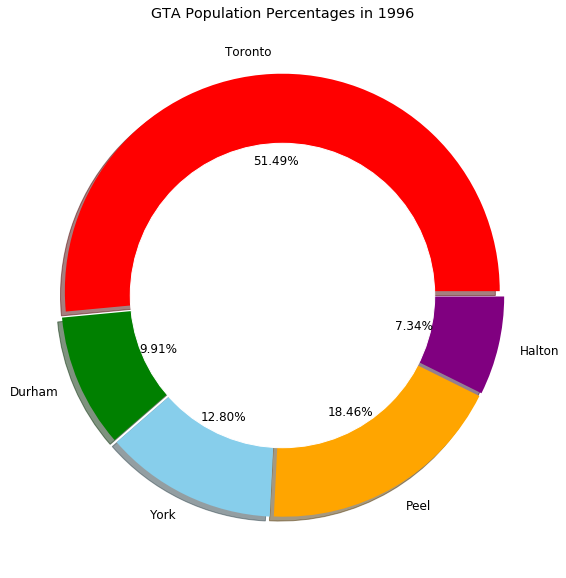

In [6]:
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
explode = (0.02, 0.02, 0.02, 0.02, 0.02)  
plt.figure(figsize=(10,10))

#set our figure dimensions 
plt.rcParams['font.size'] = 12.0

#plot our ringed pie chart
plt.pie(pop96, labels=regions, colors=['red','green','skyblue','orange','purple'],explode=explode,autopct='%.2f%%',shadow=True)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("GTA Population Percentages in 1996")
plt.show()


### Population Percentage Change Visualization

In [7]:
import seaborn as sns                 #import seaborn library 

### Importing Our Second Dataset

In [10]:
#create a multi bar chart to rperesent the percentage change in population across the 10 year span
df2 = pd.read_csv('GTA_Percentage_Change.csv')            #import csv DataFrame file
df2.head()                                                #print the dataframe 


,Region,1996-2001,2001-2006,2006-2011,2011-2016
0,GTA Total,64.0,68.6,54.7,34.0
1,Toronto,4.0,0.9,4.5,4.5
2,Durham,10.5,10.7,8.4,6.2
3,York,23.1,22.4,15.7,7.5
4,Peel,16.0,17.2,11.9,6.5


In [11]:
df2 = df2.drop([0])           #Once again we drop our 'GTA total' row 

In [12]:
df2.head()                   #printing the new DataFrame

,Region,1996-2001,2001-2006,2006-2011,2011-2016
1,Toronto,4.0,0.9,4.5,4.5
2,Durham,10.5,10.7,8.4,6.2
3,York,23.1,22.4,15.7,7.5
4,Peel,16.0,17.2,11.9,6.5
5,Halton,10.4,17.1,14.2,9.3


In [13]:
#change our datarame into a style suitable to a stacked bar plot
d = {'years':['1996-2001','2001-2006','2006-2011','2011-2016', '1996-2001','2001-2006','2006-2011','2011-2016', '1996-2001','2001-2006','2006-2011','2011-2016', '1996-2001','2001-2006','2006-2011','2011-2016', '1996-2001','2001-2006','2006-2011','2011-2016']
     ,'region':['Toronto','Toronto','Toronto','Toronto','Durham','Durham','Durham','Durham','York','York','York','York','Peel','Peel','Peel','Peel','Halton','Halton','Halton','Halton']
     ,'percent_change':['4.0','0.9','4.5','4.5','10.5','10.7','8.4','6.2','23.1','22.4','15.7','7.5','16.0','17.2','11.9','6.5','10.4','17.1','14.2','9.3']}
                        
df2_new = pd.DataFrame(data=d)

print(df2_new.dtypes)

years             object
region            object
percent_change    object
dtype: object


### Changing Necessary Values To Numeric


In [14]:
df2_new= df2_new.apply(pd.to_numeric, errors='ignore')         #Apply numeric object-type to those that need it 

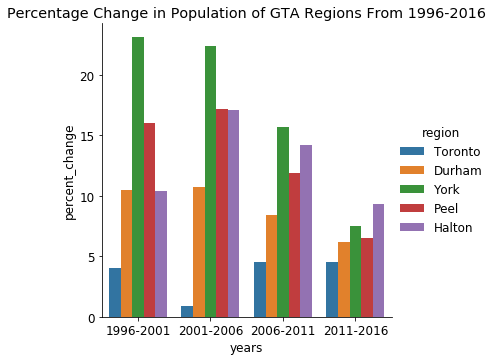

In [15]:
#print the catagoric plot
sns.catplot(x='years', y='percent_change', hue='region', data=df2_new, kind='bar')
plt.title("Percentage Change in Population of GTA Regions From 1996-2016")
sns.set(rc={'figure.figsize':(20,20)})

### References

#### Toronto Population Data

The data used to find the Regional Population for Toronto as well as percentage changes
https://www.toronto.ca/wp-content/uploads/2017/10/96b9-2016-Census-Backgrounder-Population-Dwellings.pdf (https://www.toronto.ca/wpcontent/uploads/2017/10/96b9-2016-Census-Backgrounder-Population-Dwellings.pdf)

#### Multiple Group Bar Charts

Multiple Group Bar Charts
The grouped bar chart visualization above was created using the reference file below:
https://python-graph-gallery.com/11-grouped-barplot/ (https://python-graph-gallery.com/11-grouped-barplot/)